In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
df=pd.read_csv("insurance.csv")

In [82]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [83]:
df.shape

(1338, 7)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [85]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [86]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [87]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [88]:
from sklearn.preprocessing import LabelBinarizer

In [89]:
one_hot=LabelBinarizer()
df['sex']=one_hot.fit_transform(df['sex'])

In [90]:
df['smoker']=one_hot.fit_transform(df['smoker'])

In [91]:
region=df['region']
region=pd.get_dummies(region,drop_first=True)
region.head(5)

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [92]:
df.drop('region',axis=1,inplace=True)

In [93]:
df.head(5)

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [94]:
df=pd.concat([df,region],axis=1)

In [95]:
df.head(5)

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int32  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int32  
 5   charges    1338 non-null   float64
 6   northwest  1338 non-null   uint8  
 7   southeast  1338 non-null   uint8  
 8   southwest  1338 non-null   uint8  
dtypes: float64(2), int32(2), int64(2), uint8(3)
memory usage: 56.3 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x290a9459d60>,
 'caps': [<matplotlib.lines.Line2D at 0x290a8556d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x290a94599a0>],
 'medians': [<matplotlib.lines.Line2D at 0x290a8556eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x290a8532280>],
 'means': []}

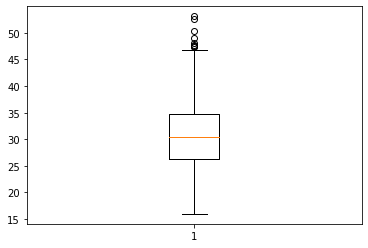

In [97]:
plt.boxplot(df['bmi'])

In [98]:
df['bmi'].sort_values(ascending=False).head(10)

1317    53.13
1047    52.58
847     50.38
116     49.06
286     48.07
1088    47.74
860     47.60
401     47.52
543     47.41
438     46.75
Name: bmi, dtype: float64

In [99]:
from scipy.stats import zscore
df['zscore_charges']=zscore(df.charges)
df[(df.zscore_charges>3.0)|(df.zscore_charges<-3.0)]

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest,zscore_charges
34,28,1,36.400,1,1,51194.55914,0,0,1,3.132806
543,54,0,47.410,0,1,63770.42801,0,1,0,4.171663
577,31,0,38.095,1,1,58571.07448,0,0,0,3.742159
819,33,0,35.530,0,1,55135.40209,1,0,0,3.458348
1146,60,1,32.800,0,1,52590.82939,0,0,1,3.248148
1230,52,1,34.485,3,1,60021.39897,1,0,0,3.861966
1300,45,1,30.360,0,1,62592.87309,0,1,0,4.074389


In [122]:
X=df.drop(['charges','zscore_charges'],axis=1)
X.head(5)

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0


In [123]:
y=df['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [124]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.7479188229139515

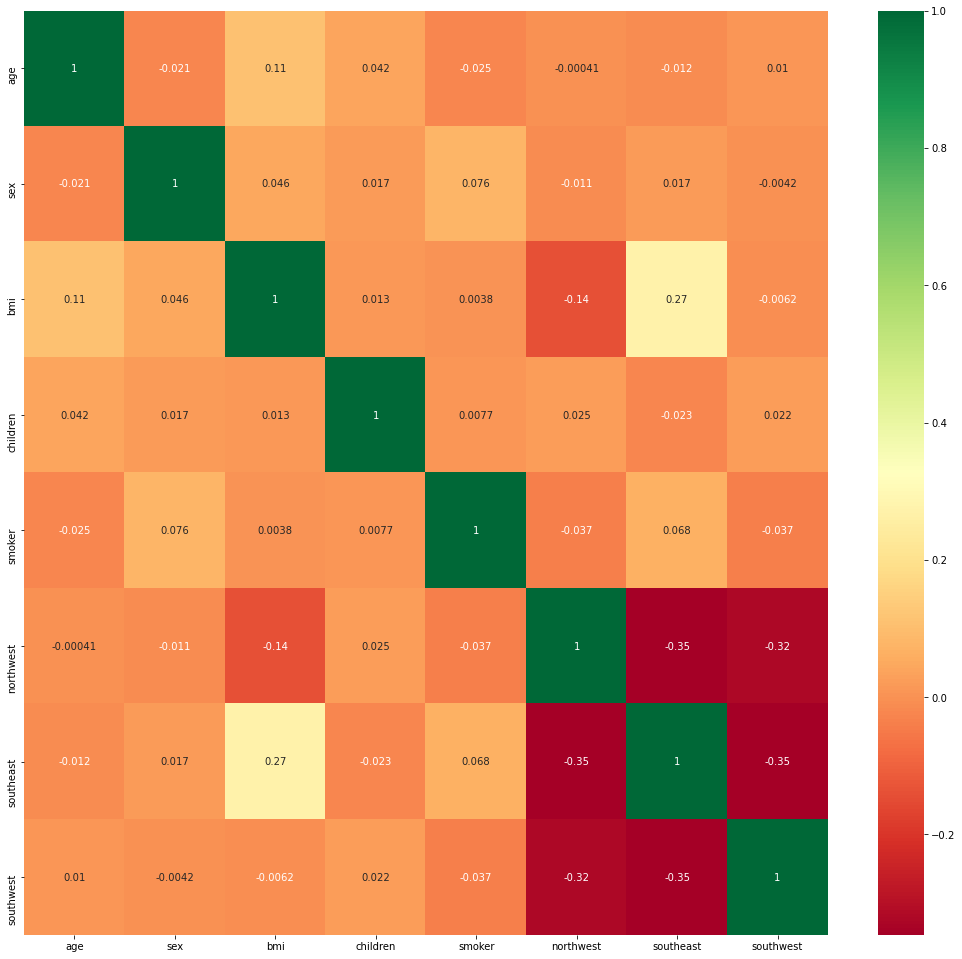

In [127]:
import seaborn as sns
df_clean_x=df.drop(['charges','zscore_charges'],axis=1)
plt.figure(figsize=(18,17))
sns.heatmap(df_clean_x.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [128]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

Model=LinearRegression()
cross_val_score(Model,X_train,y_train,cv=10).mean()


0.7368746693368161

In [129]:
y_pred=model.predict(X_test)

In [130]:
model.score(X_test,y_test)

0.758139059074901

In [131]:
print("MAE:", metrics.mean_absolute_error(y_test,y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 3937.3537156603043
MSE: 32601018.253627975
RMSE: 5709.7301384240545


In [132]:
metrics.r2_score(y_test,y_pred)

0.758139059074901